# Tugas 1 Text Analysis



## Al Haridt Mahmudi_2008108010004

## Mendapatkan Data

In [1]:
!pip install google_play_scraper
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [2]:
#Logo ChatGPT OpenAI
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://play-lh.googleusercontent.com/6qi3w4uqKaD1c-CBdkkfO6IL0lH4OoCTEdiX0oYbLFxwfvxu1t8vuwHcagdYSFmFKmI=w240-h480-rw")

In [3]:
result = reviews_all(
        'com.openai.chatgpt',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [4]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-01-01']

In [5]:
filtered_df

,at,content,score,userName
0,2023-09-24 14:03:39,Aplikasi ini sangat tidak bagus saya sangatla ...,1,Qinnaya
1,2023-09-24 12:41:29,sangat berguna sekali ya teman teman,5,Ananta Pebrianto
2,2023-09-24 12:04:00,Its just so useful for me,5,Dokkan JP
3,2023-09-24 10:25:59,membuat pintar umat manusia,5,DafiUwU GamingXD
4,2023-09-24 10:04:36,nicee,5,Dean F
...,...,...,...,...
1047,2023-07-27 15:39:30,Review pertamax diindonesia,5,Ibnu Nabawi
1048,2023-07-27 15:38:44,The Best AI,5,M Play
1049,2023-07-27 15:35:42,Sangat bagus,5,Danang Iyaah
1050,2023-07-27 15:23:05,sangat OK... mantaaaap,5,Suyono 23


In [6]:
filtered_df.to_csv('data_gpt.csv', index=False)

## Text PreProcessing

In [7]:
!pip install nltk
!pip install sastrawi


In [8]:
filtered_df2 = filtered_df.head(200)
filtered_df2

,at,content,score,userName
0,2023-09-24 14:03:39,Aplikasi ini sangat tidak bagus saya sangatla ...,1,Qinnaya
1,2023-09-24 12:41:29,sangat berguna sekali ya teman teman,5,Ananta Pebrianto
2,2023-09-24 12:04:00,Its just so useful for me,5,Dokkan JP
3,2023-09-24 10:25:59,membuat pintar umat manusia,5,DafiUwU GamingXD
4,2023-09-24 10:04:36,nicee,5,Dean F
...,...,...,...,...
195,2023-09-12 19:21:14,good,5,danu prabowo
196,2023-09-12 18:15:12,saya amat sangat bahagia telah menemukan ChatG...,5,KHARISMA PUTRI WIBOWO
197,2023-09-12 15:27:48,Mengecewakan. Ga bisa diedit.,2,Edy Rahman
198,2023-09-12 14:52:51,sungguh sangat membantu jawabannya layan Tepat...,5,Fery Printing


### Case with python with orbit data


In [9]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-9-971aa562494d>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
100%|██████████| 200/200 [00:00<00:00, 10557.95it/s]
<ipython-input-9-971aa562494d>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])


In [10]:
!pip install wordcloud

<ipython-input-11-d289ce6d565e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)


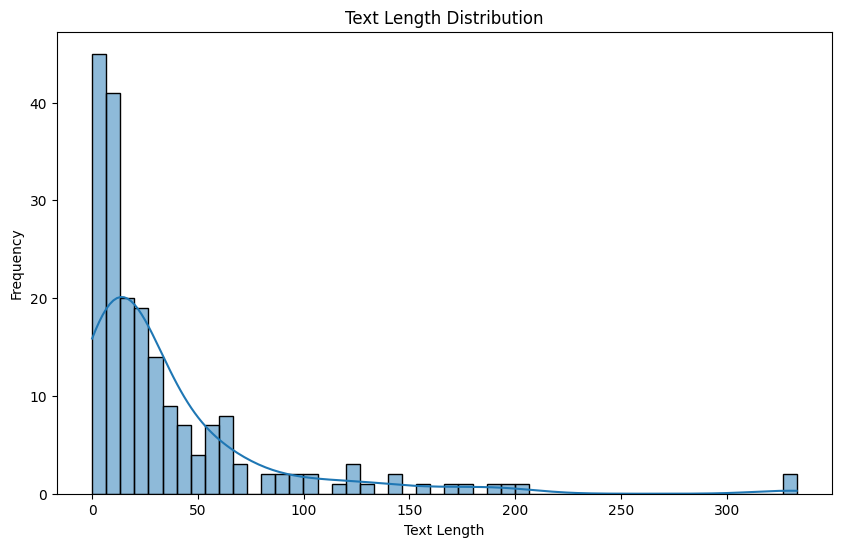

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df2, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

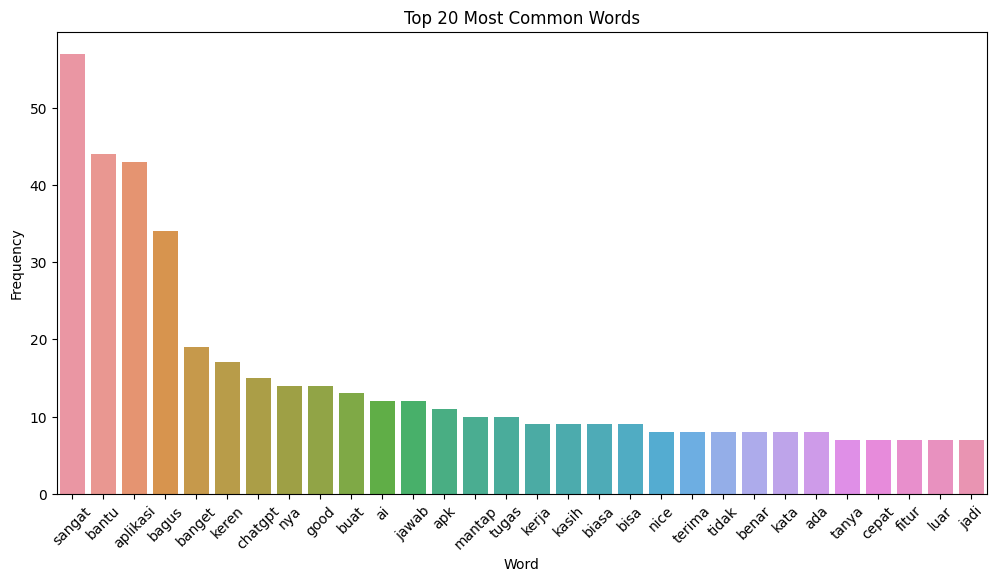

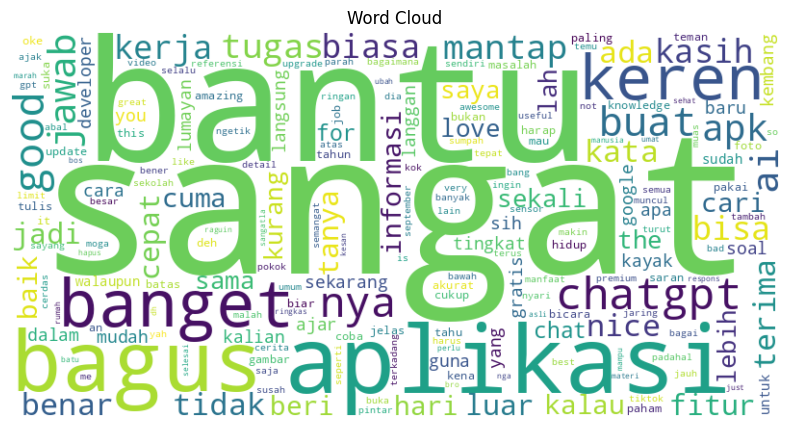

In [12]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df2['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [13]:
filtered_df2

,at,content,score,userName,contentp,contentp_clean,text_length
0,2023-09-24 14:03:39,Aplikasi ini sangat tidak bagus saya sangatla ...,1,Qinnaya,aplikasi ini sangat tidak bagus saya sangatla ...,aplikasi sangat bagus sangatla marah saya hapu...,56
1,2023-09-24 12:41:29,sangat berguna sekali ya teman teman,5,Ananta Pebrianto,sangat berguna sekali ya teman teman,sangat sekali teman teman,25
2,2023-09-24 12:04:00,Its just so useful for me,5,Dokkan JP,its just so useful for me,it is just so useful for me,27
3,2023-09-24 10:25:59,membuat pintar umat manusia,5,DafiUwU GamingXD,membuat pintar umat manusia,buat pintar umat manusia,24
4,2023-09-24 10:04:36,nicee,5,Dean F,nicee,nice,4
...,...,...,...,...,...,...,...
195,2023-09-12 19:21:14,good,5,danu prabowo,good,good,4
196,2023-09-12 18:15:12,saya amat sangat bahagia telah menemukan ChatG...,5,KHARISMA PUTRI WIBOWO,saya amat sangat bahagia telah menemukan chatg...,amat sangat bahagia temu chatgpt rupa temu lua...,98
197,2023-09-12 15:27:48,Mengecewakan. Ga bisa diedit.,2,Edy Rahman,mengecewakan ga bisa diedit,kecewa bisa edit,16
198,2023-09-12 14:52:51,sungguh sangat membantu jawabannya layan Tepat...,5,Fery Printing,sungguh sangat membantu jawabannya layan tepat...,sungguh sangat bantu jawab layan tepat sayang ...,126


In [14]:
filtered_df2.to_csv('gpt_clean_review.csv', index=False)